# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
%matplotlib inline

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

<function matplotlib.pyplot.show(close=None, block=None)>

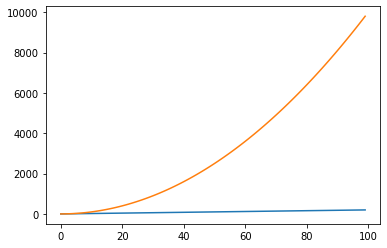

In [4]:
# Method 1

plt.plot(x,y, label= "linear")
plt.plot(x,z, label = "quadratic")


plt.show


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

<function matplotlib.pyplot.show(close=None, block=None)>

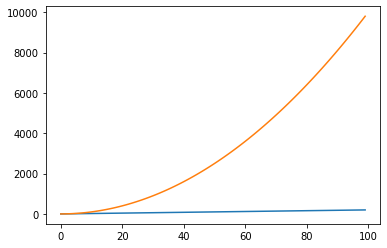

In [5]:
# Method 2
fig, sub= plt.subplots()
sub.plot(x,y)
sub.plot(x,z)
plt.show


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'y label')

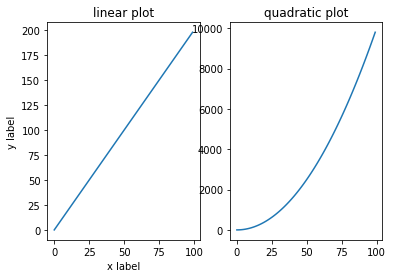

In [6]:
# your code here. 
fig, [xy, xz] = plt.subplots(1,2)
xy.plot(x,y)
xz.plot(x,z)
xy.set_title('linear plot')
xz.set_title("quadratic plot")
xy.set_xlabel('x label')
xy.set_ylabel('y label')

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [7]:
# your code here ?


#### As a bonus challenge, try to add a legend to the plot.

<function matplotlib.pyplot.show(close=None, block=None)>

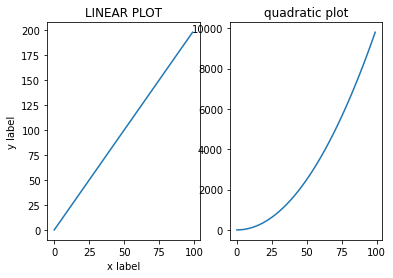

In [8]:
# your code here
fig, [xy, xz] = plt.subplots(1,2)
xy.plot(x,y, label= "line1")
xz.plot(x,z, label = "line2")
xy.set_title('LINEAR PLOT')
xz.set_title("quadratic plot")
xy.set_xlabel('x label')
xy.set_ylabel('y label')
plt.show
#no idea why it dont show

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
import pandas as pd
fitbit =pd.read_csv("./Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

<function matplotlib.pyplot.show(close=None, block=None)>

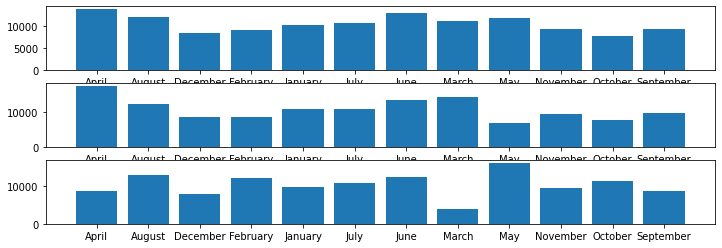

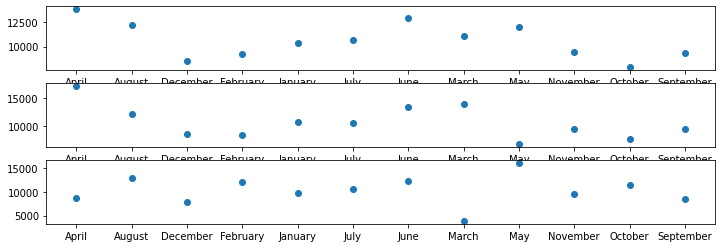

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
plot_options , (combined,work,weekend) = plt.subplots(nrows = 3, ncols = 1, figsize = (12,4))

med=fitbit.groupby("Months").agg({"Steps" : "median"}).reset_index()
medwork = fitbit[fitbit["Work_or_Weekend"]==1].groupby("Months").agg({"Steps" : "median"}).reset_index()
medweekend=fitbit[fitbit["Work_or_Weekend"]==0].groupby("Months").agg({"Steps" : "median"}).reset_index()
med.columns

combined.bar(med['Months'],med['Steps'])

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here


work.bar(medwork['Months'],medwork['Steps'])
weekend.bar(medweekend['Months'],medweekend['Steps'])

plt.show
#scatter
plot_options , (combined,work,weekend) = plt.subplots(nrows = 3, ncols = 1, figsize = (12,4))
combined.scatter(med['Months'],med['Steps'])
work.scatter(medwork['Months'],medwork['Steps'])
weekend.scatter(medweekend['Months'],medweekend['Steps'])
plt.show




#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [11]:
# your code here?




## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
# your code here
titanic = pd.read_csv("./titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [13]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [14]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=("float64","int64"))


                                  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [15]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include="object")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [16]:
# your code here
plt.style.use('classic')
figsize=(12,6)

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

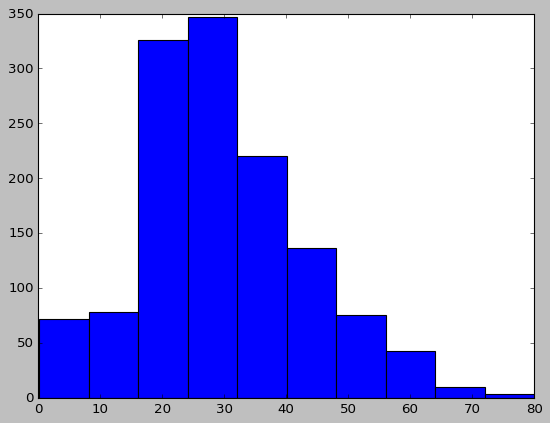

In [17]:
# your code here. bins =10
plt.hist(titanic["Age"], 10)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<function matplotlib.pyplot.show(close=None, block=None)>

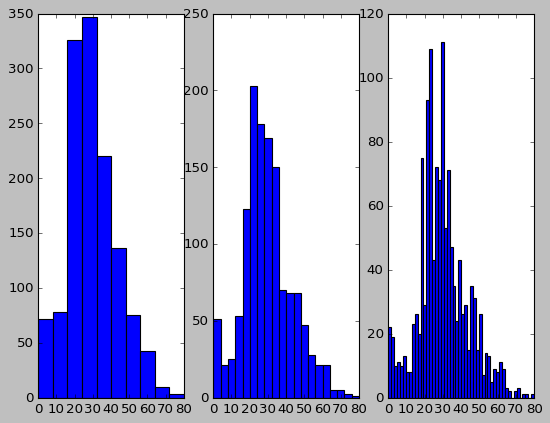

In [18]:
# your code here
fig, [a,b,c]= plt.subplots(1,3)
a.hist(titanic["Age"], 10)
b.hist(titanic["Age"], 20)
c.hist(titanic["Age"], 50)
plt.show



#### How does the bin size affect your plot?

In [19]:
"""
makes it less readable because the ages bins are closer one to another
"""

'\nmakes it less readable because the ages bins are closer one to another\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:>

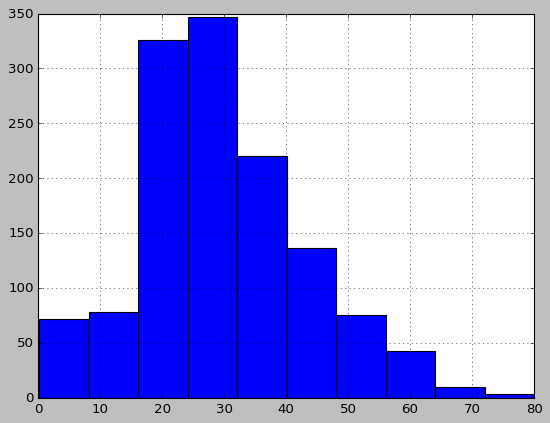

In [20]:
# your code here
titanic["Age"].hist()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [21]:
# Method 1 - matplotlib
# your code here
#?

<AxesSubplot:>

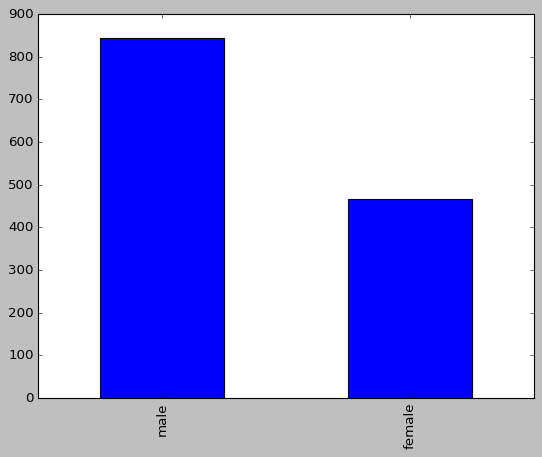

In [22]:
# Method 2 - seaborn
# your code here
titanic['Gender'].value_counts().plot.bar()

#### Use the right plot to visualize the column `Pclass`.

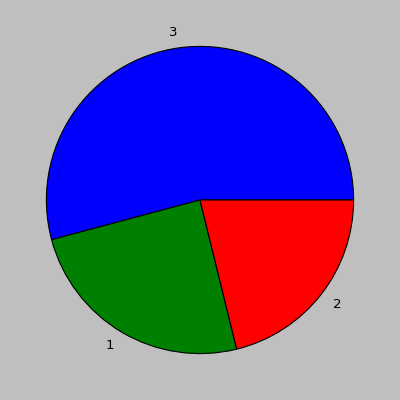

In [23]:
# your code here

plt.pie(titanic["Pclass"].value_counts(),labels = titanic["Pclass"].value_counts().index)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='index', ylabel='Age'>

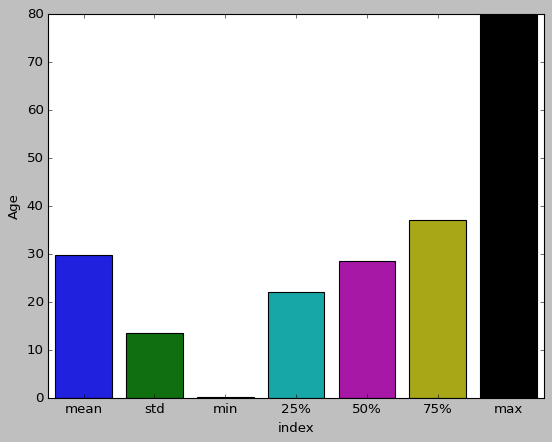

In [24]:
# your code here
summary=titanic["Age"].describe().reset_index()
summary
sns.barplot(x="index", y= "Age", data=summary[1:])
#try with a boxplot

In [25]:
"""
took the count off the analyze as it has nothing to do with the values and is obviously much higher
"""

'\ntook the count off the analyze as it has nothing to do with the values and is obviously much higher\n'

#### What does the last plot tell you about the feature `Age`?

In [26]:
"""
a lot of new born, few childrens btw 5 and 15, lot btw 20 and 35 and then decreasing pretty linearily
"""

'\na lot of new born, few childrens btw 5 and 15, lot btw 20 and 35 and then decreasing pretty linearily\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

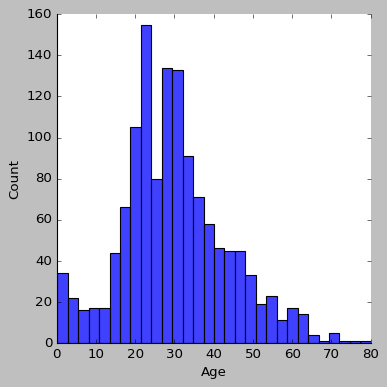

In [27]:
# your code here ?
sns.displot(titanic["Age"])

#### What additional information does the last plot provide about feature `Age`?

In [28]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [29]:
# Method 1 - matplotlib
# your code here

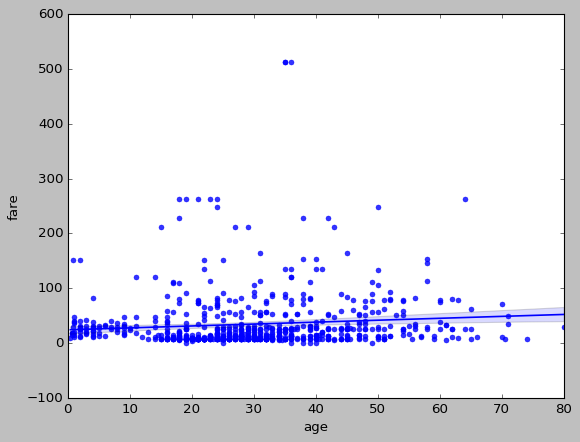

In [30]:
# Method 2 - seaborn
titanic = sns.load_dataset("titanic")
sns.regplot(x="age", y="fare", data=titanic);

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

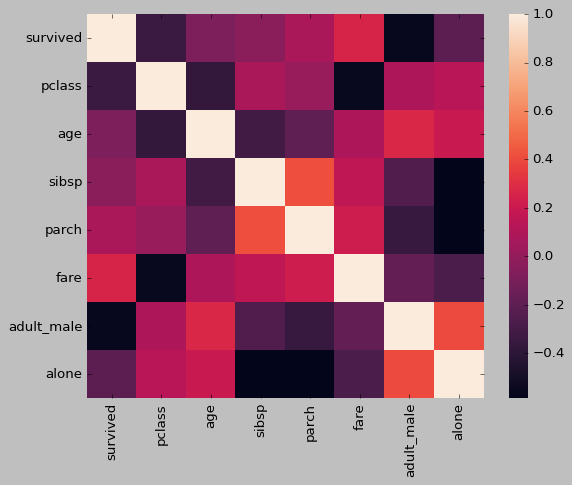

In [31]:
# your code here
corr= titanic.corr()
sns.heatmap(corr)

#### What are the most correlated features?

In [32]:

"""
sibsp and parch, adult male and alone
"""
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

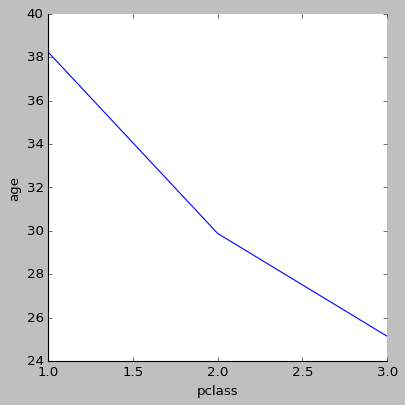

In [33]:
# your code here
#titanic.plot.scatter('age','pclass')
sns.relplot(x="pclass", y="age",kind="line", data=titanic)
#if you dont think it is a very appropriate plot.. me neither
#boxplot

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

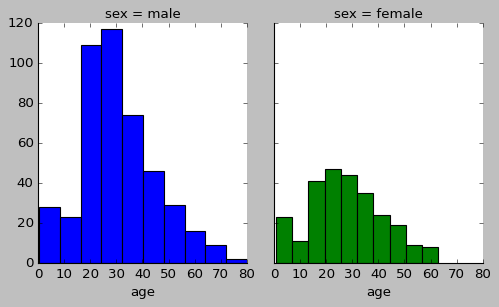

In [38]:

import seaborn as sns
# your code here

grid = sns.FacetGrid(titanic, col="sex", hue='sex', height=4, aspect=0.8)
graph = grid.map(plt.hist, "age")

In [ ]:
#no clue...